<a href="https://colab.research.google.com/github/luongduong147/Thesis/blob/main/Lu%E1%BA%ADn_v%C4%83n_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA preparing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas_datareader
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 235 kB 40.1 MB/s 
     |████████████████████████████████| 6.4 MB 38.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=f490339aa6a2535e1fa165fc9fbe3abf9d923227a7ee0a5b4b36a7b896459980
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#Data import
import investpy
df = investpy.get_index_historical_data(index='VN 30',
                                        country='VietNam',
                                        from_date='04/05/2016',
                                        to_date='04/05/2019')
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2016-05-04,600.63,606.88,597.40,602.57,53001,VND
2016-05-05,603.68,609.59,603.32,604.69,43705,VND
2016-05-06,604.96,610.19,604.70,607.55,38019,VND
2016-05-09,610.78,612.82,604.24,604.24,39065,VND
2016-05-10,601.23,605.37,597.91,604.56,40948,VND


In [ ]:
#Checking Na value
data.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [ ]:
#Plotting OHLC chart
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=data.index,
                      open=data.Open,
                      high=data.High,
                      low=data.Low,
                      close=data.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=data.index, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
grouped_data = df.groupby('Date', as_index = False).mean()
grouped_data

,Open,High,Low,Close,Volume
0,600.63,606.88,597.40,602.57,53001.0
1,603.68,609.59,603.32,604.69,43705.0
2,604.96,610.19,604.70,607.55,38019.0
3,610.78,612.82,604.24,604.24,39065.0
4,601.23,605.37,597.91,604.56,40948.0
...,...,...,...,...,...
745,877.97,889.02,877.97,888.65,35005.0
746,888.57,888.91,883.72,885.65,29184.0
747,885.47,890.69,882.58,890.55,34568.0
748,890.60,893.89,889.61,893.87,36440.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

#train_test_split
train_df = int(len(grouped_data) * 0.8)
test_df = len(grouped_data) - train_df
df_train = grouped_data.iloc[0:train_df, :]
df_test = grouped_data.iloc[train_df:len(grouped_data), :]
print("Train size: {}, Test size: {}". format(len(df_train), len(df_test)))

Train size: 600, Test size: 150


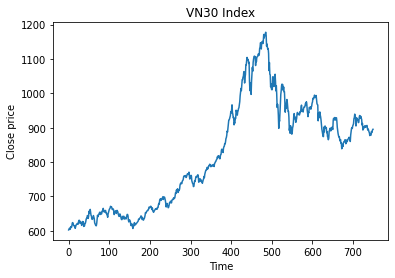

In [ ]:
#Visualizing
data_plot = grouped_data.loc[:, ["Close"]].values
plt.plot(data_plot)
plt.xlabel("Time")
plt.ylabel("Close price")
plt.title("VN30 Index")
plt.show()

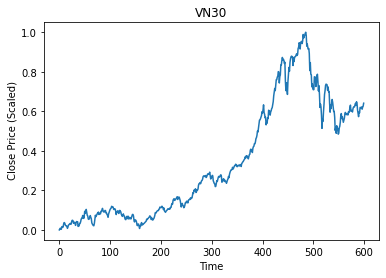

In [ ]:
#Reshape the data
data = df_train.loc[:, ["Close"]].values
data.shape
#reshape
data = data.reshape(-1, 1)

#change type
data = data.astype("float32")
data.shape
#MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(data)
data_scaled
#plot scaled data
plt.plot(data_scaled)
plt.xlabel("Time")
plt.ylabel(" Close Price (Scaled)")
plt.title("VN30")
plt.show()

In [ ]:
from keras.engine import sequential
#Spliting the Train data scaled
train=int(len(data_scaled))*0.8
val=len(data_scaled)-train
data_scaled_train=data_scaled[0:int(train), :]
data_scaled_val=data_scaled[int(train):len(data_scaled), :]

#Creating X,Y set with time_step and 1 output 
#train:
time_step = 20
dataX = []
dataY = []
for i in range(len(data_scaled_train) - time_step - 1):
    a = data_scaled_train[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_train[i + time_step, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)
#validation
time_step = 20
dataX = []
dataY = []
for i in range(len(data_scaled_val) - time_step - 1):
    a = data_scaled_val[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_val[i + time_step, 0])
valX = np.array(dataX)
valY = np.array(dataY)
#reshape to 3D tensor
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))


In [ ]:
#LSTM modeling
model = Sequential()
model.add(LSTM(256, input_shape = (1, time_step)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss= "mean_squared_error", optimizer = "adam")
model.fit(trainX, trainY, epochs=300, batch_size=50)
model.summary()

Epoch 1/300
10/10 [==============================] - 2s 9ms/step - loss: 0.0657
Epoch 2/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 5/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 6/300
10/10 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 7/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 8/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 9/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 10/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 11/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 12/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 13/300
10/10 [================

In [ ]:
import math
trainPredict = model.predict(trainX)
valPredict = model.predict(valX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
valPredict = scaler.inverse_transform(valPredict)
valY_ = scaler.inverse_transform([valY])

# calculate root mean squared error
trainscore = math.sqrt(mean_squared_error(trainY_[0], trainPredict[:, 0]))
print("Train Score: %.2f RMSE" % (trainscore))
valscore = math.sqrt(mean_squared_error(valY_[0], valPredict[:, 0]))
print("Val Score: %.2f RMSE" % (valscore))



Train Score: 9.46 RMSE
Val Score: 24.98 RMSE


No handles with labels found to put in legend.


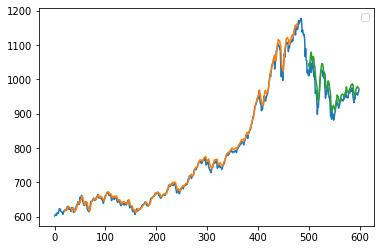

In [ ]:
#Visualize
# shifting train
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainPredict) + time_step, :] = trainPredict
# shifting validation predictions for plotting
valPredictPlot = np.empty_like(data_scaled)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(trainPredict) + (time_step * 2) + 1:len(data_scaled) - 1, :] = valPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(valPredictPlot)
#plt.xlim(2500,3200)
plt.legend()
plt.show()

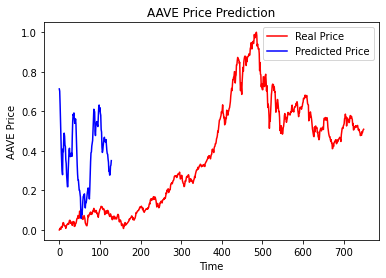

In [ ]:
#predict on real data

#Reshape the test
test = df_test.loc[:, ["Close"]].values
test.shape
#reshape
test = test.reshape(-1, 1)

#change type
test = test.astype("float32")
test.shape
#MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
test_scaled = scaler.fit_transform(test)
#Creating X,Y set with time_step and 1 output 
time_step = 20
dataX = []
dataY = []
for i in range(len(test_scaled) - time_step - 1):
    a = test_scaled[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(test_scaled[i + time_step, 0])
testX = np.array(dataX)
testY = np.array(dataY)
#reshape
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#predict
testPredict=model.predict(testX)

scaler = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = scaler.fit_transform(data_plot)




In [ ]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(valY,valPredict)
rmse=np.sqrt(mean_squared_error(valY,valPredict))
r2=r2_score(valY,valPredict)
print(mae,rmse,r2)

978.6945 979.60474 -187115366.2712016


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



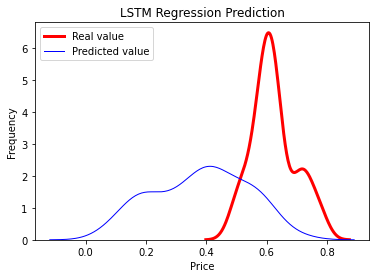

In [ ]:
sns.distplot(valY, color = 'red', label = 'Real value',kde=True, hist=False,kde_kws={'linewidth':3})
sns.distplot(testPredict, color = 'blue', label = 'Predicted value',kde=True, hist=False,kde_kws={'linewidth':1})
plt.title('LSTM Regression Prediction')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()